In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/MLD/MLD_Baseline_2.6_cropped.nc', decode_times=True)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/MLD/MLD_OAE_2.6_cropped.nc', decode_times=True)

In [7]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [8]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [9]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### EU Seasonal Average of MLD

In [10]:
data_baseline_plot = sliced_data_baseline.somxl010.mean(dim=('y', 'x'))
data_oae_plot = sliced_data_oae.somxl010.mean(dim=('y', 'x'))

In [11]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

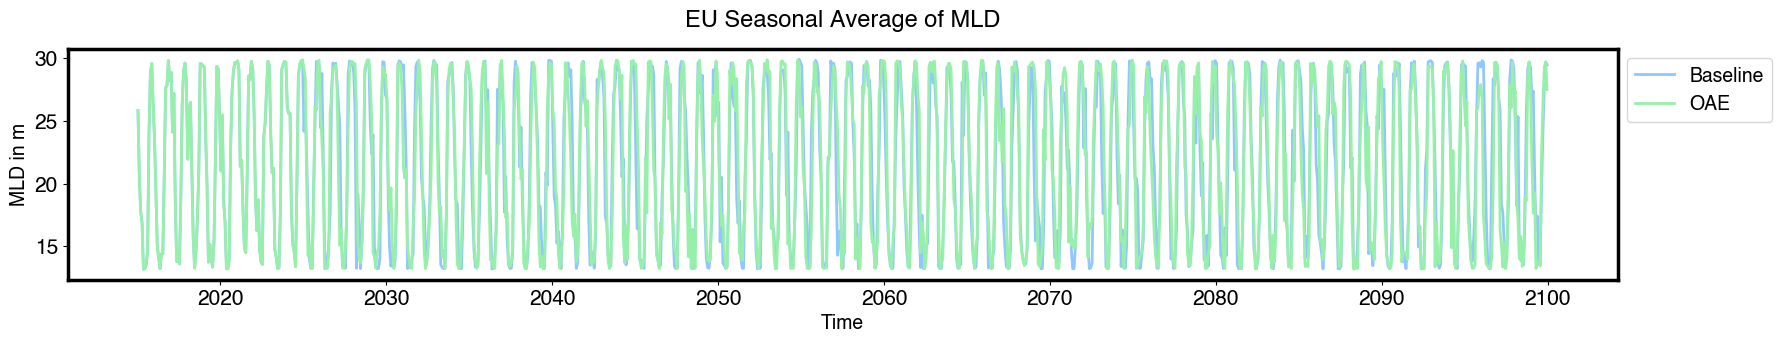

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.somxl010, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.somxl010, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of MLD', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline.somxl010.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.somxl010.mean(dim=('y', 'x'))

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

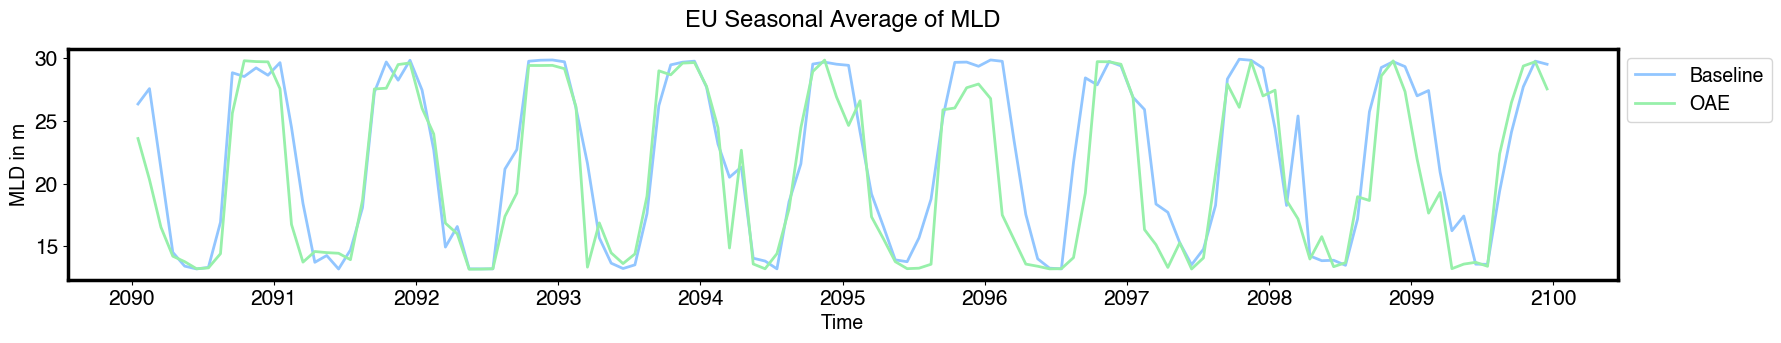

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.somxl010, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.somxl010, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of MLD', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of MLD

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

mld_baseline = sliced_data_baseline["somxl010"].sel(time_counter=slice(start_date, end_date))

In [17]:
mld_season_summary_baseline = mld_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_season_mean_all_years_baseline = mld_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
mld_seasonal_mean_baseline = mld_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [18]:
mld_oae = sliced_data_oae["somxl010"].sel(time_counter=slice(start_date, end_date))

In [19]:
mld_season_summary_oae = mld_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_season_mean_all_years_oae = mld_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
mld_seasonal_mean_oae = mld_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

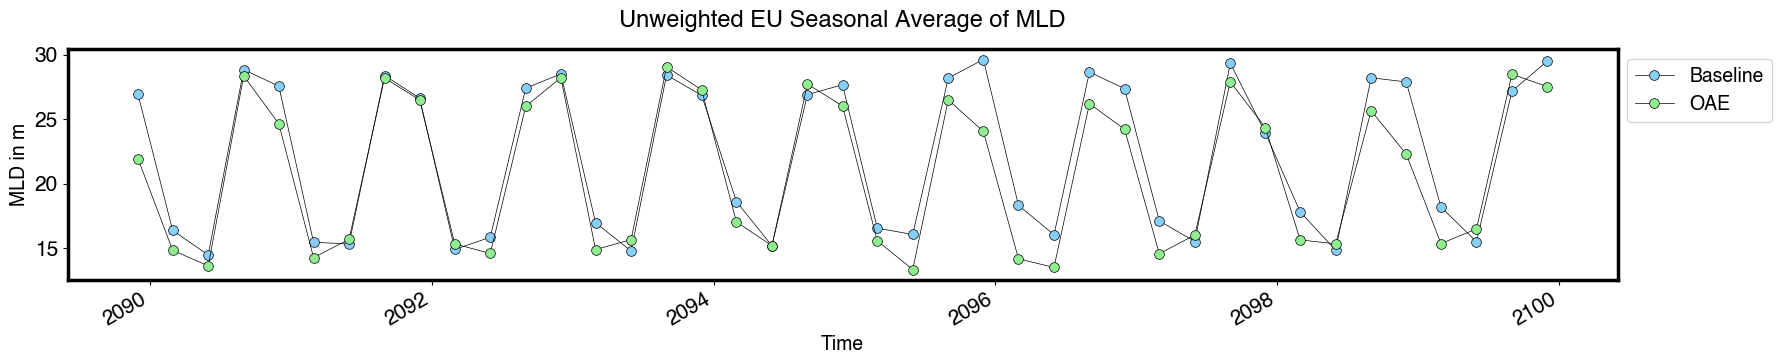

In [20]:
f, ax = plt.subplots(figsize=(20, 3))

mld_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of MLD", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of MLD

In [21]:
month_length_baseline = mld_baseline.time_counter.dt.days_in_month
mld_weighted_mean_baseline = ((mld_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
mld_weighted_mean_baseline = mld_weighted_mean_baseline.where(mld_weighted_mean_baseline)
mld_weighted_season_baseline = mld_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [22]:
month_length_oae = mld_oae.time_counter.dt.days_in_month
mld_weighted_mean_oae = ((mld_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
mld_weighted_mean_oae = mld_weighted_mean_oae.where(mld_weighted_mean_oae)
mld_weighted_season_oae = mld_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

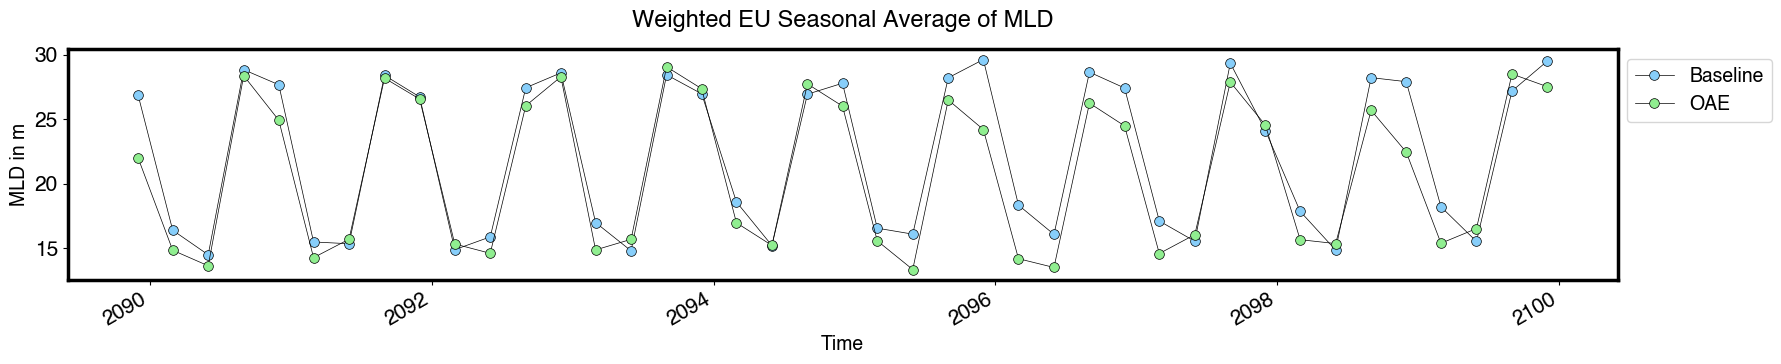

In [23]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
mld_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of MLD", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of MLD (seasons displayed)

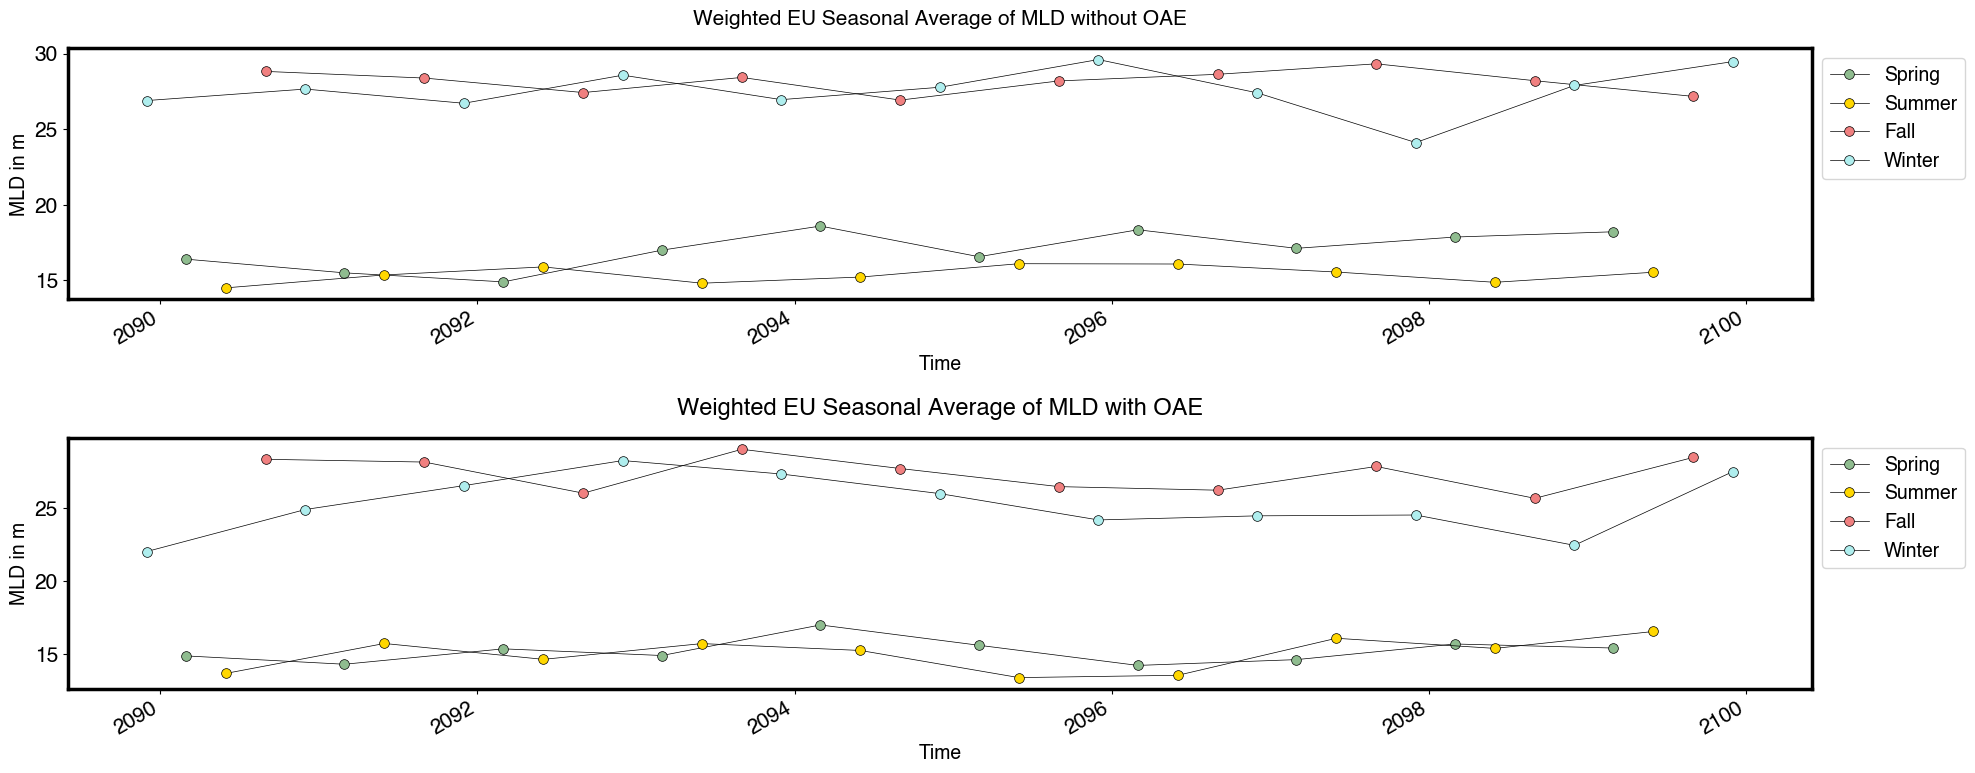

In [24]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in mld_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of MLD without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('MLD in m', fontsize=14)

for month, arr in mld_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of MLD with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('MLD in m', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of MLD without OAE (seasons displayed)

In [25]:
mld_weighted_baseline = mld_weighted_season_baseline.to_dataframe('mld_Flux')
mld_weighted_baseline['Month'] = pd.DatetimeIndex(mld_weighted_baseline.index).month

In [26]:
conditions = [
    (mld_weighted_baseline['Month'] == 3),
    (mld_weighted_baseline['Month'] == 6),
    (mld_weighted_baseline['Month'] == 9),
    (mld_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

mld_weighted_baseline['Month'] = np.select(conditions, values)

In [27]:
colors = dict(zip(mld_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

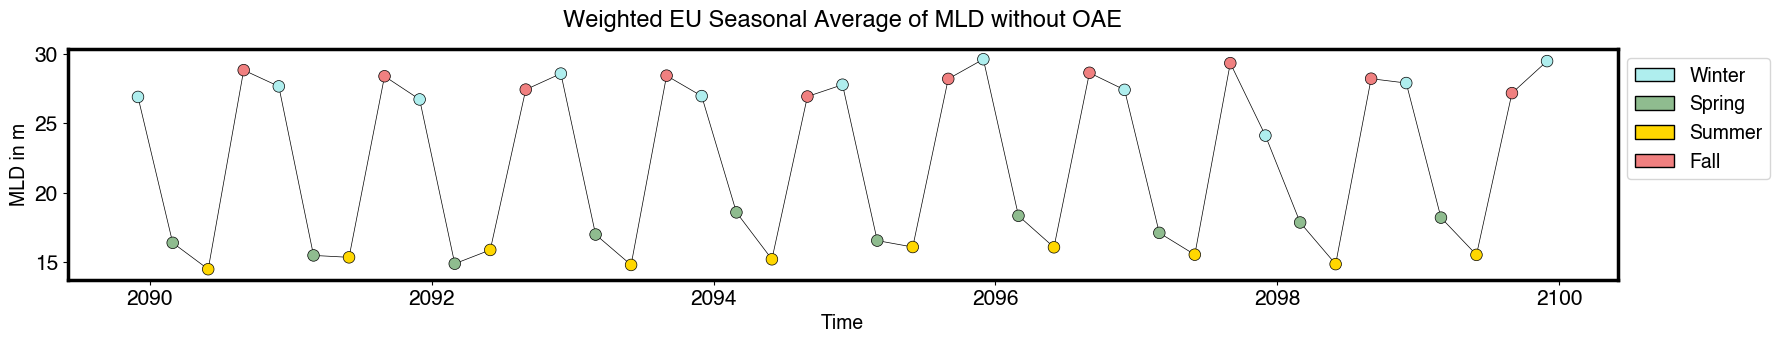

In [28]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.mld_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.mld_Flux, color=mld_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of MLD with OAE (seasons displayed)

In [29]:
mld_weighted_oae = mld_weighted_season_oae.to_dataframe('mld_Flux')
mld_weighted_oae['Month'] = pd.DatetimeIndex(mld_weighted_oae.index).month

In [30]:
conditions = [
    (mld_weighted_oae['Month'] == 3),
    (mld_weighted_oae['Month'] == 6),
    (mld_weighted_oae['Month'] == 9),
    (mld_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

mld_weighted_oae['Month'] = np.select(conditions, values)

In [31]:
colors = dict(zip(mld_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

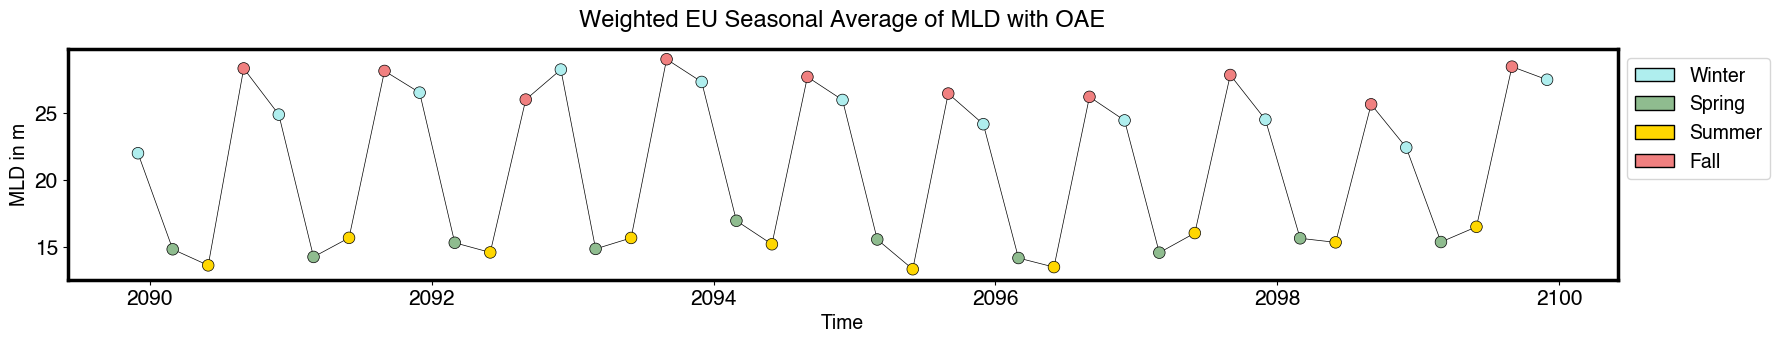

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.mld_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.mld_Flux, color=mld_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of MLD (seasons displayed)

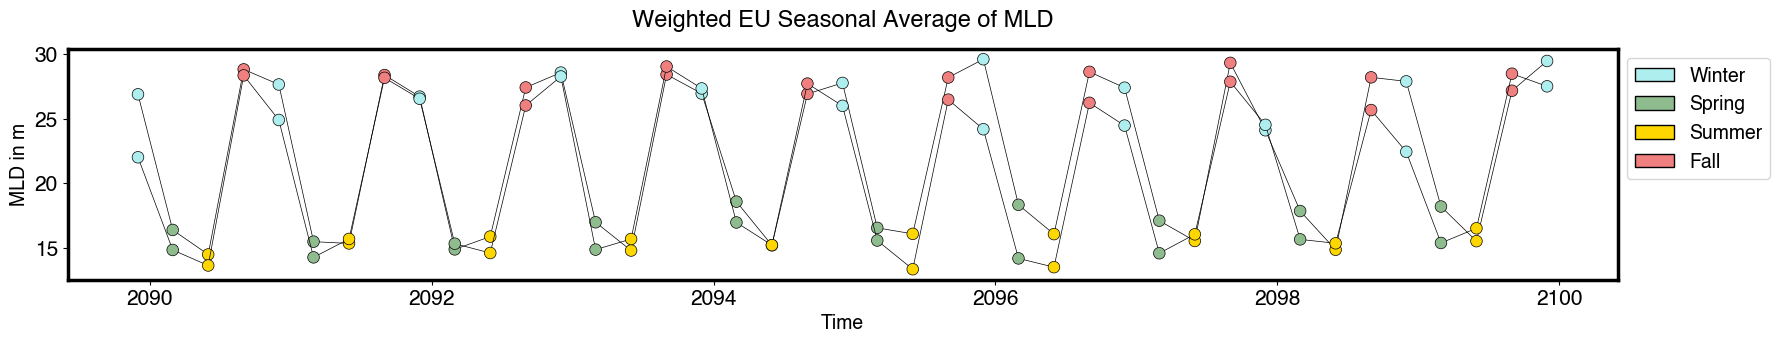

In [33]:
colors = dict(zip(mld_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(mld_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.mld_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.mld_Flux, color=mld_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.mld_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.mld_Flux, color=mld_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of MLD without OAE

In [34]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

mld_baseline_month = sliced_data_baseline["somxl010"].sel(time_counter=slice(start_date_month, end_date_month))

In [35]:
mld_month_summary_baseline = mld_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_month_mean_all_years_baseline = mld_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
mld_monthly_mean_baseline = mld_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [36]:
mld_oae_month = sliced_data_oae["somxl010"].sel(time_counter=slice(start_date_month, end_date_month))

In [37]:
mld_month_summary_oae = mld_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_month_mean_all_years_oae = mld_oae_month.resample(time_counter='M').mean(keep_attrs=True)
mld_monthly_mean_oae = mld_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

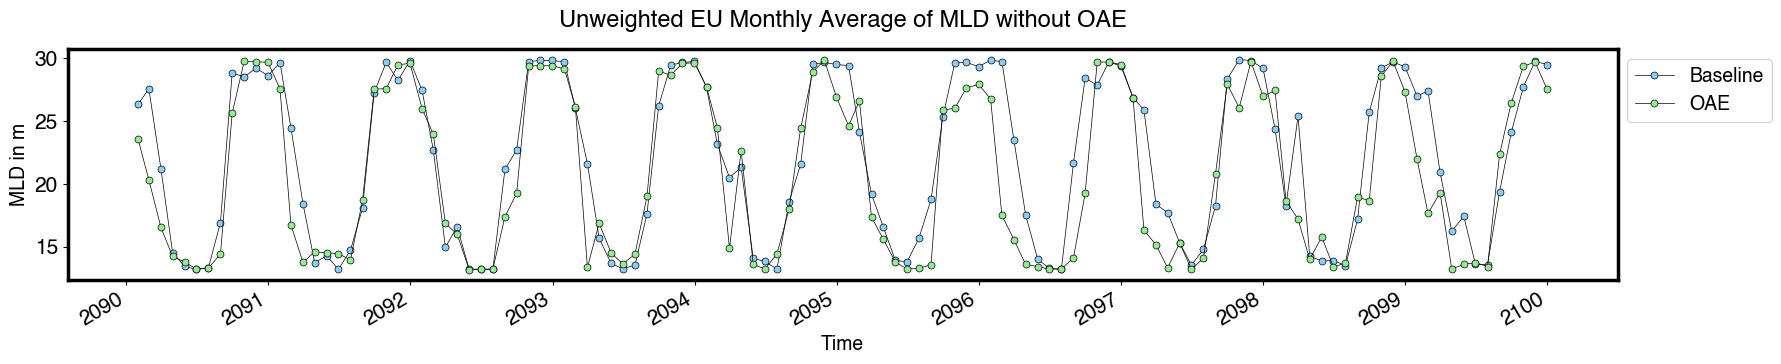

In [38]:
f, ax = plt.subplots(figsize=(20, 3))

mld_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of MLD without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of MLD without OAE (months displayed)

In [39]:
mld_baseline_monthly = mld_monthly_mean_baseline.to_dataframe('somxl010')
mld_baseline_monthly['Month'] = pd.DatetimeIndex(mld_baseline_monthly.index).month

In [40]:
conditions = [
    (mld_baseline_monthly['Month'] == 1),
    (mld_baseline_monthly['Month'] == 2),
    (mld_baseline_monthly['Month'] == 3),
    (mld_baseline_monthly['Month'] == 4),
    (mld_baseline_monthly['Month'] == 5),
    (mld_baseline_monthly['Month'] == 6),
    (mld_baseline_monthly['Month'] == 7),
    (mld_baseline_monthly['Month'] == 8),
    (mld_baseline_monthly['Month'] == 9),
    (mld_baseline_monthly['Month'] == 10),
    (mld_baseline_monthly['Month'] == 11),
    (mld_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

mld_baseline_monthly['Month'] = np.select(conditions, values)

In [41]:
colors = dict(zip(mld_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

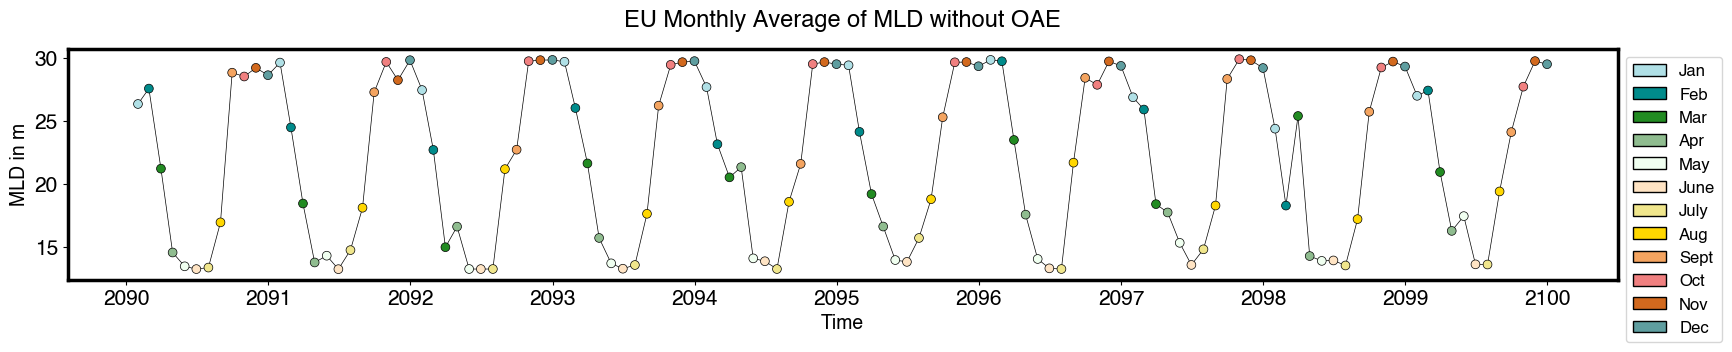

In [42]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, color=mld_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("EU Monthly Average of MLD without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of MLD with OAE (months displayed)

In [43]:
mld_oae_monthly = mld_monthly_mean_oae.to_dataframe('somxl010')
mld_oae_monthly['Month'] = pd.DatetimeIndex(mld_oae_monthly.index).month

In [44]:
conditions = [
    (mld_oae_monthly['Month'] == 1),
    (mld_oae_monthly['Month'] == 2),
    (mld_oae_monthly['Month'] == 3),
    (mld_oae_monthly['Month'] == 4),
    (mld_oae_monthly['Month'] == 5),
    (mld_oae_monthly['Month'] == 6),
    (mld_oae_monthly['Month'] == 7),
    (mld_oae_monthly['Month'] == 8),
    (mld_oae_monthly['Month'] == 9),
    (mld_oae_monthly['Month'] == 10),
    (mld_oae_monthly['Month'] == 11),
    (mld_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

mld_oae_monthly['Month'] = np.select(conditions, values)

In [45]:
colors = dict(zip(mld_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

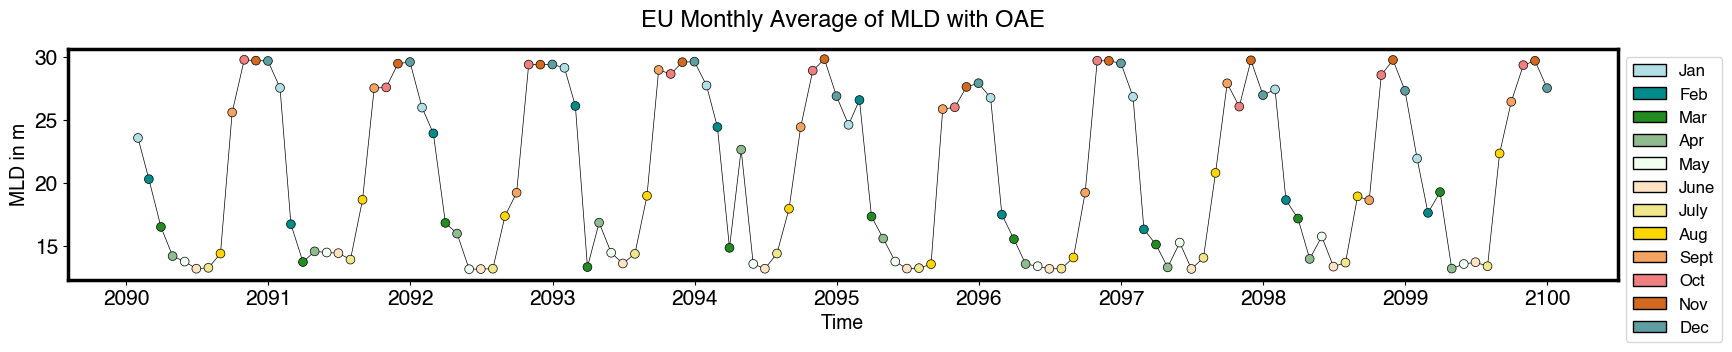

In [46]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.somxl010, color=mld_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("EU Monthly Average of MLD with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of MLD (months displayed)

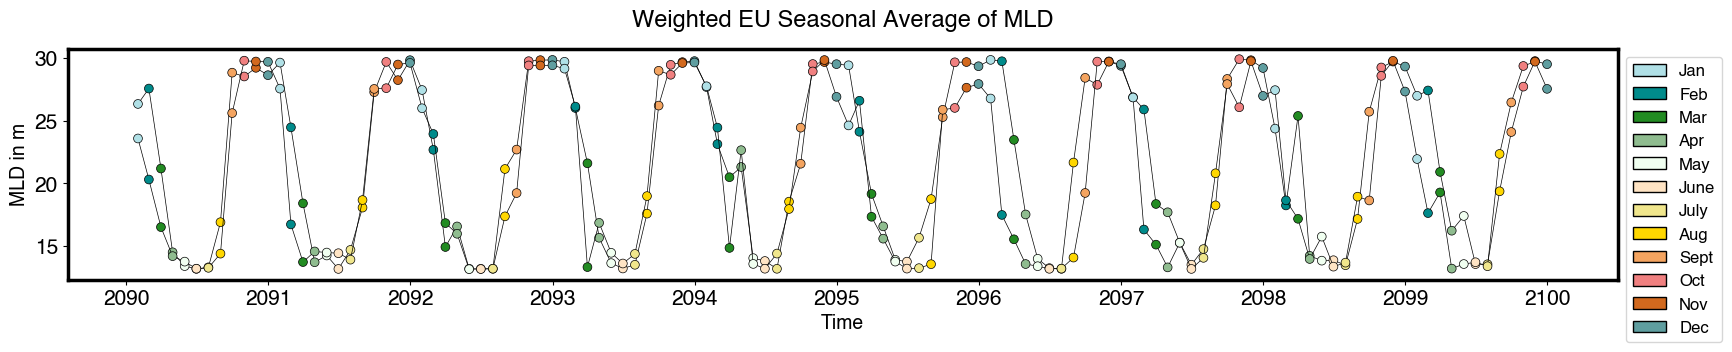

In [47]:
colors = dict(zip(mld_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, color=mld_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.somxl010, color=mld_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD", fontsize=17, y=1.06)

pass

### Δ MLD between Baseline and OAE from 2090 to 2100

In [48]:
delta_somxl010 = mld_oae_monthly.somxl010 - mld_baseline_monthly.somxl010

In [49]:
delta_somxl010 = delta_somxl010.to_xarray()

In [50]:
delta_somxl010 = delta_somxl010.to_dataframe('somxl010')
delta_somxl010['Month'] = pd.DatetimeIndex(delta_somxl010.index).month

In [51]:
conditions = [
    (delta_somxl010['Month'] == 1),
    (delta_somxl010['Month'] == 2),
    (delta_somxl010['Month'] == 3),
    (delta_somxl010['Month'] == 4),
    (delta_somxl010['Month'] == 5),
    (delta_somxl010['Month'] == 6),
    (delta_somxl010['Month'] == 7),
    (delta_somxl010['Month'] == 8),
    (delta_somxl010['Month'] == 9),
    (delta_somxl010['Month'] == 10),
    (delta_somxl010['Month'] == 11),
    (delta_somxl010['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_somxl010['Month'] = np.select(conditions, values)

In [52]:
colors = dict(zip(delta_somxl010.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

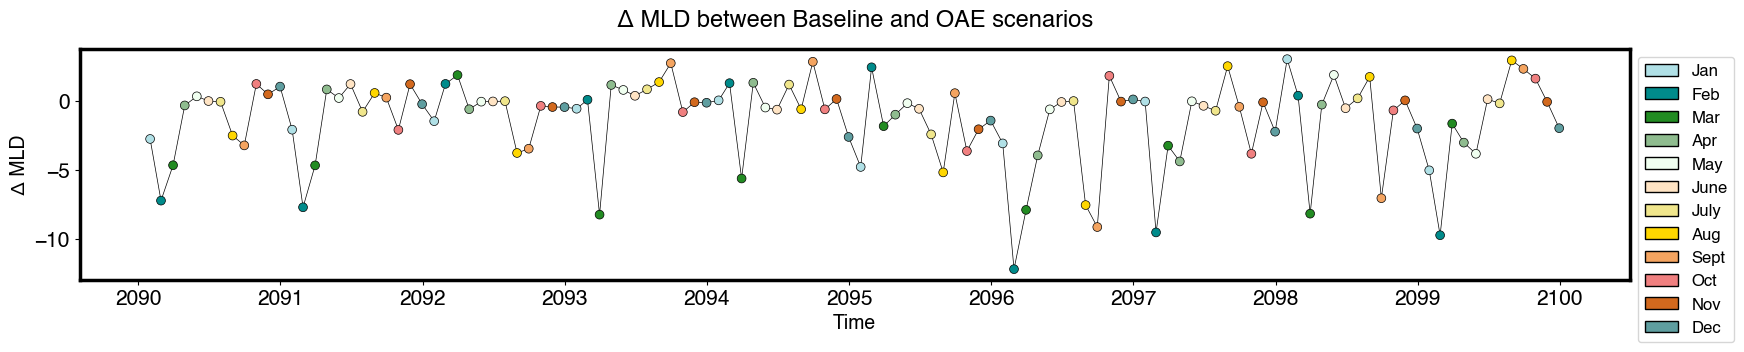

In [53]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_somxl010.index, delta_somxl010.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_somxl010.index, delta_somxl010.somxl010, color=delta_somxl010.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ MLD', fontsize=14)
ax.set_title("Δ MLD between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

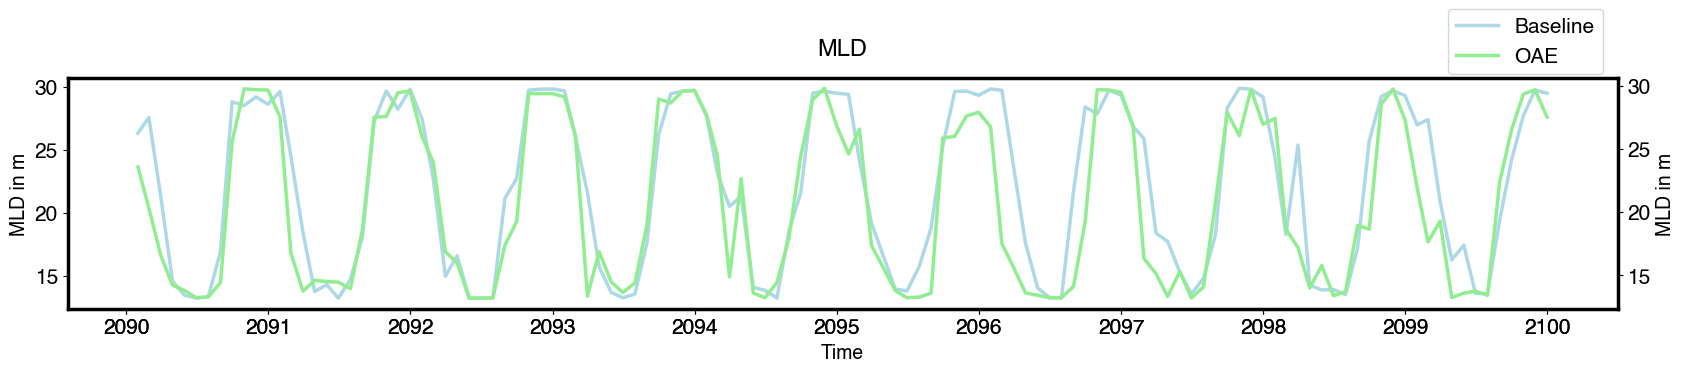

In [54]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, linewidth=2.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('MLD in m', fontsize=14)

ax2.plot(mld_oae_monthly.index, mld_oae_monthly.somxl010, linewidth=2.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('MLD in m', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('MLD', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()